$$
\textbf{Stationarity Testing Methods in Finance}
$$

#1.Data Preparation
Stationarity is a crucial assumption in financial time series modeling. A time series is stationary if its statistical properties do not change over time. The most common methods for testing stationarity include:

1. **Augmented Dickey-Fuller (ADF) Test**:
   - Null Hypothesis: The time series has a unit root (non-stationary).
   - Alternative Hypothesis: The time series is stationary.
   - A p-value below 0.05 typically indicates stationarity.

2. **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**:
   - Null Hypothesis: The time series is stationary.
   - Alternative Hypothesis: The time series has a unit root (non-stationary).
   - A high p-value supports stationarity.

3. **Phillips-Perron (PP) Test**:
   - Similar to the ADF test but with different handling of heteroskedasticity and autocorrelation.

Stationarity is crucial for econometric models such as ARIMA, GARCH, and other time series forecasting methods.



Column Names: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


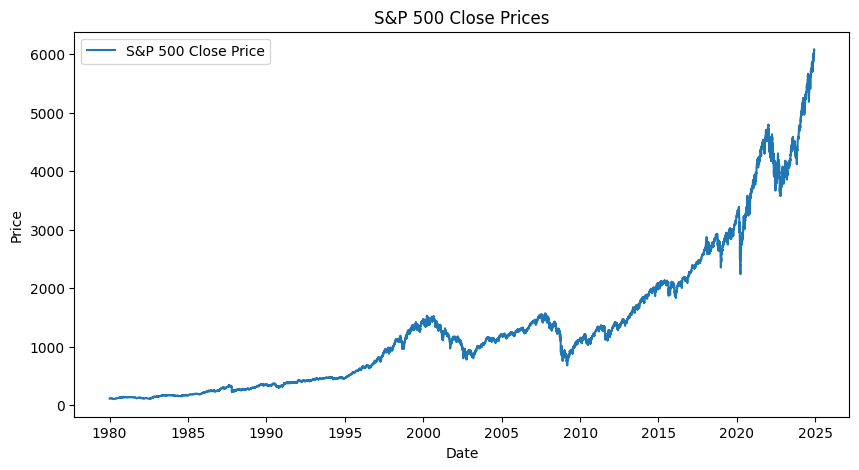

In [11]:

# 1. Load S&P 500 data from a CSV file


import pandas as pd
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
# Suppress InterpolationWarning
warnings.simplefilter("ignore", InterpolationWarning)
# 1. Load S&P 500 data from a CSV file

file_path = "/content/SP500m.csv"

# Load the data while skipping the incorrect first row
data = pd.read_csv(file_path, skiprows=2)

# Print column names to verify correctness
print("Column Names:", data.columns)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Ensure the correct column name is used
close_column = "Close" if "Close" in data.columns else "Adj Close"

# Convert 'Date' column to datetime format if it exists
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
else:
    print("Warning: 'Date' column not found!")

#2. Extract the 'Close' price and drop any missing values
sp_close = data[close_column].dropna()

# 3. Plot the raw Close prices
plt.figure(figsize=(10, 5))
plt.plot(sp_close, label='S&P 500 Close Price')
plt.title('S&P 500 Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()




#Discuss Stationary#
it is obviously upwarding and is not stationary so we should apply diffrencing.


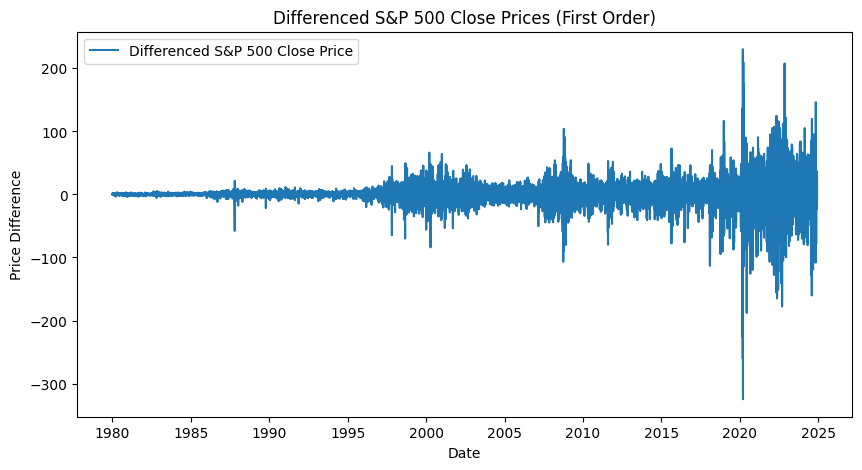

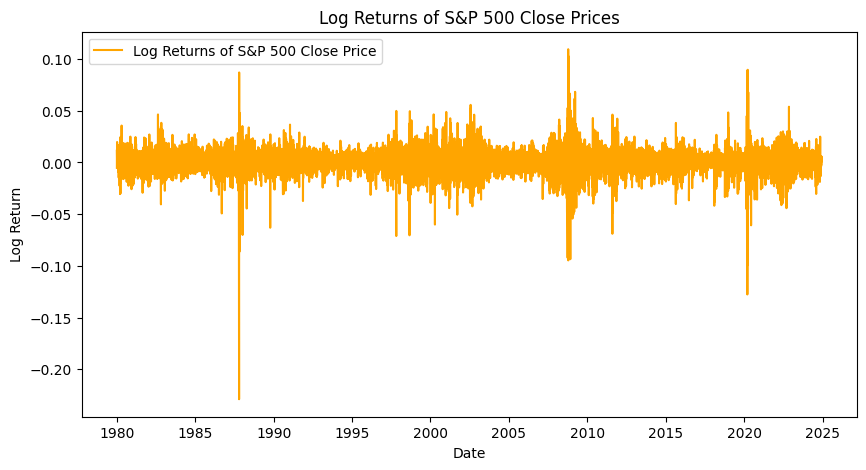

In [12]:

# First-order differencing of the S&P 500 close prices
sp_close_diff = sp_close.diff().dropna()

# Calculate log returns:
# Option 1: Directly compute the difference of the logarithm of prices
sp_close_log_return = np.log(sp_close).diff().dropna()

# Option 2: Alternatively, compute log returns as log(price_t / price_{t-1})
# sp_close_log_return = np.log(sp_close / sp_close.shift(1)).dropna()

# Plot the first-order differenced series
plt.figure(figsize=(10, 5))
plt.plot(sp_close_diff, label='Differenced S&P 500 Close Price')
plt.title('Differenced S&P 500 Close Prices (First Order)')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

# Plot the log returns series
plt.figure(figsize=(10, 5))
plt.plot(sp_close_log_return, label='Log Returns of S&P 500 Close Price', color='orange')
plt.title('Log Returns of S&P 500 Close Prices')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()


# ADF and KPSS Tests: Mathematical Summary

## 1. Augmented Dickey-Fuller (ADF) Test

**Objective:**  
Test for the presence of a unit root (non-stationarity) in a time series.

**Model:**  
Consider the regression equation:
$$
\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \sum_{i=1}^{p} \delta_i \Delta y_{t-i} + \varepsilon_t,
$$
where:
- $y_t$ is the time series value at time $t$.
- $\Delta y_t = y_t - y_{t-1}$ is the first difference.
- $\alpha$ is a constant (intercept).
- $\beta t$ is an optional deterministic time trend.
- $\gamma$ is the coefficient on the lagged level $y_{t-1}$.
- $\delta_i$ are coefficients for lagged differences (included to capture higher-order autocorrelation).
- $\varepsilon_t$ is a white noise error term.

**Hypotheses:**
- **Null hypothesis ($H_0$):** The time series has a unit root, i.e., $\gamma = 0$.
- **Alternative hypothesis ($H_1$):** The time series is stationary, i.e., $\gamma < 0$.

**Key Point:**  
A significantly negative test statistic (compared to critical values from non-standard distributions) leads to rejection of $H_0$, implying stationarity.

---

## 2. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

**Objective:**  
Test the null hypothesis that a time series is stationary (either around a level or a deterministic trend).

**Model:**  
The time series is decomposed as:
$$
y_t = \mu_t + r_t + \varepsilon_t,
$$
where:
- $\mu_t$ is the deterministic component (e.g., constant or trend).
- $r_t$ is a stochastic trend (random walk):
$$
r_t = r_{t-1} + u_t, \quad u_t \sim \text{i.i.d. } (0, \sigma_u^2),
$$
- $\varepsilon_t$ is a stationary error term.

**Hypotheses:**
- **Null hypothesis ($H_0$):** The series is stationary (i.e., the variance of the random walk component is zero, $\sigma_u^2 = 0$).
- **Alternative hypothesis ($H_1$):** The series is non-stationary (i.e., $\sigma_u^2 > 0$).

**Test Statistic:**  
1. **Detrending:** Estimate the deterministic component and obtain residuals $\hat{\varepsilon}_t$.
2. **Partial Sums:** Compute the cumulative sum of residuals:
   $$
   S_t = \sum_{i=1}^{t} \hat{\varepsilon}_i.
   $$
3. **KPSS Statistic:** Calculate
   $$
   \eta = \frac{1}{T^2} \sum_{t=1}^{T} S_t^2 \Big/ \hat{\sigma}^2,
   $$
   where $\hat{\sigma}^2$ is an estimate of the long-run variance of the residuals.

**Key Point:**  
A high KPSS statistic indicates evidence against stationarity, leading to rejection of $H_0$.




In [13]:
#Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("Augmented Dickey-Fuller Test:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] < 0.05:
        print("Conclusion: Data is likely stationary.")
    else:
        print("Conclusion: Data is likely non-stationary.")
    print("----------------------------------")

# KPSS Test
def kpss_test(series):
    result = kpss(series, regression='c', nlags='auto')
    print("KPSS Test:")
    print(f"KPSS Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[3].items():
        print(f"   {key}: {value}")
    if result[1] > 0.05:
        print("Conclusion: Data is likely stationary.")
    else:
        print("Conclusion: Data is likely non-stationary.")
    print("----------------------------------")
print("Testing stationarity of the differenced Close prices:")
adf_test(sp_close_diff)
kpss_test(sp_close_diff)

# 7. Justification of Stationarity Based on Hypothesis Testing
# The ADF test checks whether a unit root is present (null hypothesis: non-stationary).
# The KPSS test checks for stationarity (null hypothesis: stationary).
# If the ADF p-value is below 0.05 and the KPSS p-value is above 0.05, we conclude stationarity.

print("Justification of stationarity after transformation:")
adf_result = adfuller(sp_close_diff, autolag='AIC')
kpss_result = kpss(sp_close_diff, regression='c', nlags='auto')

if adf_result[1] < 0.05 and kpss_result[1] > 0.05:
    print("The transformed data is now stationary based on ADF (p < 0.05) and KPSS (p > 0.05).")
else:
    print("Further transformations may be required as stationarity is not fully confirmed.")

Testing stationarity of the differenced Close prices:
Augmented Dickey-Fuller Test:
ADF Statistic: -18.201499824186374
p-value: 2.4052154687593728e-30
Critical Values:
   1%: -3.430929548817389
   5%: -2.861796129316801
   10%: -2.5669063325263544
Conclusion: Data is likely stationary.
----------------------------------
KPSS Test:
KPSS Statistic: 0.8507612464002541
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Conclusion: Data is likely non-stationary.
----------------------------------
Justification of stationarity after transformation:
Further transformations may be required as stationarity is not fully confirmed.


### 8. Discussion on Limitations of the Approach

- **Structural Breaks**: Financial time series may experience sudden shifts due to economic events, crises, or policy changes. Differencing alone may not fully address these changes, requiring more advanced modeling techniques.
- **Differencing Order Selection**: The choice of differencing order is often heuristic and may need further refinement based on model performance and stationarity tests.
- **Conflicting Test Results**: The ADF and KPSS tests sometimes yield contradictory results, making expert judgment necessary when determining stationarity.
- **Volatility Clustering**: The current approach does not account for heteroscedasticity (time-varying volatility).

## 2. Random Walk Model

### (a) Literature Review on the Random Walk Hypothesis
The **Random Walk Hypothesis** suggests that stock prices follow a random path, meaning future price movements are independent of past values. This concept is central to the **Efficient Market Hypothesis (EMH)**, which asserts that financial markets fully reflect all available information, making it impossible to consistently predict stock prices. Studies, such as those by Fama (1970), support this hypothesis, concluding that stock prices exhibit unpredictable behavior under weak-form efficiency.



## (b) Fit a Random Walk Model

To model the stock prices as a **Random Walk**, we assume:

$$
P_t = P_{t-1} + \epsilon_t
$$

where:

- $ \epsilon_t \sim N(0, \sigma^2) $ is a white noise error term.
- $ P_t $ represents the stock price at time \( t \).
- $ P_{t-1} $ is the previous time step price.

This assumption implies that **price changes are purely random**, meaning stock prices follow a **Martingale process** and are unpredictable in the short term.


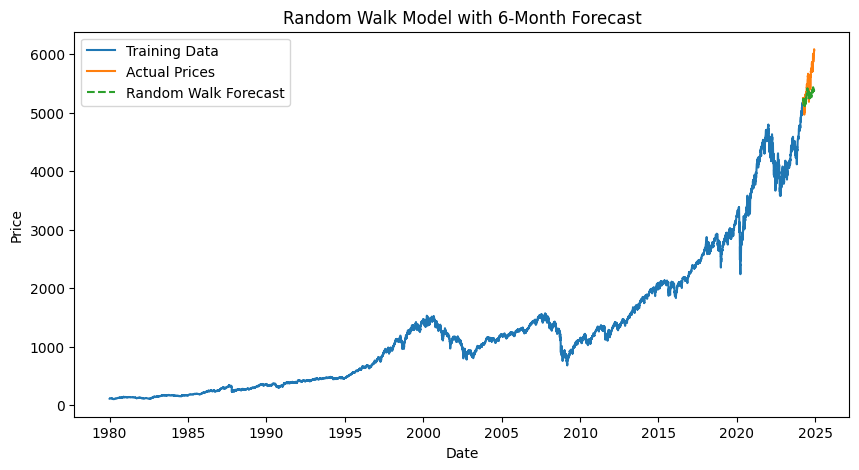

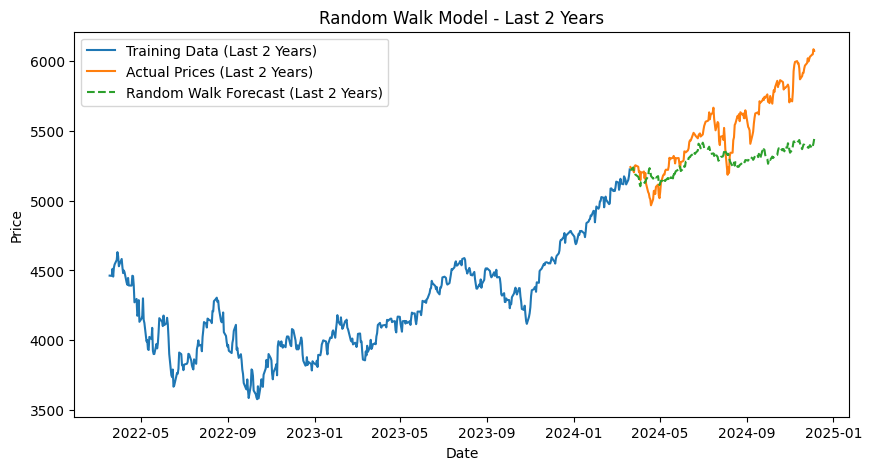

In [14]:
forecast_horizon = 180

# Split data into training and testing
train = sp_close.iloc[:-forecast_horizon]
test = sp_close.iloc[-forecast_horizon:]

# Generate Random Walk forecast
random_walk_forecast = [train.iloc[-1]]
for i in range(len(test)-1):
    random_walk_forecast.append(random_walk_forecast[-1] + np.random.normal(0, train.diff().std()))

# Convert forecast to Pandas Series
random_walk_forecast = pd.Series(random_walk_forecast, index=test.index)

# Plot Random Walk Model vs. Actual Close Prices
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices')
plt.plot(random_walk_forecast, label='Random Walk Forecast', linestyle='dashed')
plt.title('Random Walk Model with 6-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
# Zoomed-in plot for last two years
plt.figure(figsize=(10, 5))
plt.plot(train.loc[train.index[-504:]], label='Training Data (Last 2 Years)')
plt.plot(test, label='Actual Prices (Last 2 Years)')
plt.plot(random_walk_forecast, label='Random Walk Forecast (Last 2 Years)', linestyle='dashed')
plt.title('Random Walk Model - Last 2 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Compute MAE and RMSE and log-likelihood
mae = mean_absolute_error(test, random_walk_forecast)
rmse = np.sqrt(mean_squared_error(test, random_walk_forecast))
log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * train.diff().var()) + ((test - random_walk_forecast) ** 2) / train.diff().var())

# Compute Maximum Log-Likelihood (assuming perfect model)
optimal_var = test.diff().var()  # Best possible variance using true values
max_log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * optimal_var) + ((test - test.mean()) ** 2) / optimal_var)

# Compute Log-Likelihood Difference
log_likelihood_difference = max_log_likelihood - log_likelihood

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Log-Likelihood: {log_likelihood}")
print(f"Maximum Log-Likelihood: {max_log_likelihood}")
print(f"Log-Likelihood Difference: {log_likelihood_difference}")

Mean Absolute Error (MAE): 248.43796770661234
Root Mean Squared Error (RMSE): 308.78159154359366
Log-Likelihood: -24113.883988476682
Maximum Log-Likelihood: -4485.138984378474
Log-Likelihood Difference: 19628.745004098208


### Assumptions
The **Random Walk Model** assumes:
1. **Future Price Movements Are Independent**  
   - Stock prices follow:  
     $$ P_t = P_{t-1} + \epsilon_t $$
   - Meaning past values **do not predict future values**.

2. **Price Changes Follow a Normal Distribution**  
   - The random shock $ \epsilon_t $ is assumed to be:  
     $$ \epsilon_t \sim N(0, \sigma^2) $$

3. **Efficient Market Hypothesis (EMH) Holds**  
   - Prices fully reflect available information, so **no predictable patterns exist**.

4. **Constant Volatility**  
   - Assumes **price fluctuations have a constant variance** over time.

---

### Limitations of the Model
While the **Random Walk Model** is a useful benchmark, it is **too simplistic** for financial data due to the following reasons:

1. **Financial Markets Exhibit Trends and Mean Reversion**  
   - Stock indices often **drift upwards** over time.
   - Some assets exhibit **mean reversion** rather than pure randomness.

2. **Volatility is Not Constant**  
   - Real-world markets show **volatility clustering**, violating the assumption of constant variance.
   - Models like **GARCH** better capture this behavior.

3. **Market Microstructure Effects & Behavioral Biases**  
   - **Investor psychology, trading frictions, and liquidity constraints** introduce **short-term dependencies**.

4. **Impact of External Events**  
   - Financial markets are affected by **macroeconomic news, interest rates, and crises**.
   - The **Random Walk Model does not account for external shocks**.

5. **Prices Cannot Be Negative**  
   - The model does not consider that asset prices have a lower bound at zero.
   - In reality, prices **cannot be negative**, which is an important constraint overlooked in the random walk formulation.


## 3. Geometric Brownian Motion (GBM)

### (a) Literature Review on GBM Models in Mathematical Finance

The **Geometric Brownian Motion (GBM)** is a stochastic process widely used in **mathematical finance**.  
It serves as the foundation of the **Black-Scholes model** and assumes that asset prices follow a **log-normal distribution**.

The GBM model is defined by the **stochastic differential equation**:

$$ dP_t = \mu P_t dt + \sigma P_t dW_t $$

where:

- $ P_t $ is the asset price at time $ t $,
- $ \mu $ (mu) is the **drift term** (expected return),
- $ \sigma $ (sigma) is the **volatility** (standard deviation of returns),
- $ W_t $ is a **standard Wiener process** (Brownian motion).

This model captures **both deterministic trends (drift)** and **random fluctuations (volatility)**, making it a **realistic model for stock prices**.


Estimated Drift (μ): 0.08816642803302799
Estimated Volatility (σ): 0.1799599833459158


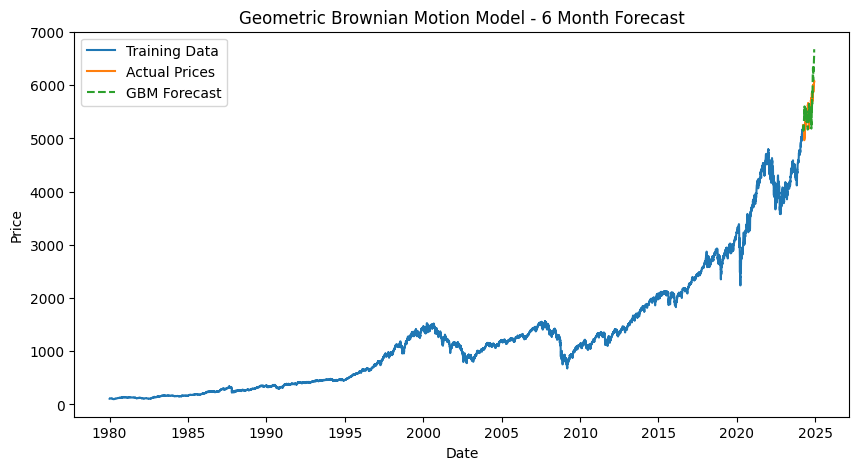

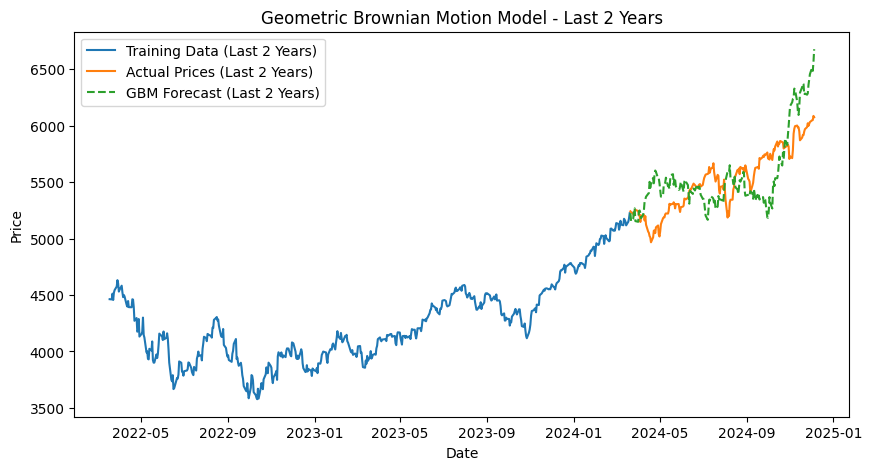

GBM Forecast and Comparison with Actual Prices Completed.


In [16]:
### (b) Fit a GBM Model to the Data and Estimate Parameters

# Forecasting using GBM by training on all but last 6 months
forecast_horizon = 180  # 6 months ~ 180 trading days
train = sp_close.iloc[:-forecast_horizon]
test = sp_close.iloc[-forecast_horizon:]

# Compute daily log returns based on training data
log_returns_train = np.log(train / train.shift(1)).dropna()

# Estimate GBM parameters based on training data
mu = log_returns_train.mean() * 252  # Annualized drift
sigma = log_returns_train.std() * np.sqrt(252)  # Annualized volatility

print(f"Estimated Drift (μ): {mu}")
print(f"Estimated Volatility (σ): {sigma}")

# Simulate GBM Path for Forecast Horizon (6 months)
def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    W = np.random.standard_normal(size=N) * np.sqrt(dt)
    S = np.zeros(N)
    S[0] = S0
    for t in range(1, N):
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * W[t])
    return S

# Forecast based on last observed price before test period
S0 = train.iloc[-1]
gbm_forecast = simulate_gbm(S0, mu, sigma, forecast_horizon / 252, forecast_horizon)

gbm_forecast_series = pd.Series(gbm_forecast, index=test.index)

# Plot GBM vs Actual Prices including forecast period
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices')
plt.plot(gbm_forecast_series, label='GBM Forecast', linestyle='dashed')
plt.title('Geometric Brownian Motion Model - 6 Month Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Zoomed-in plot for last two years
plt.figure(figsize=(10, 5))
plt.plot(train.loc[train.index[-504:]], label='Training Data (Last 2 Years)')
plt.plot(test, label='Actual Prices (Last 2 Years)')
plt.plot(gbm_forecast_series, label='GBM Forecast (Last 2 Years)', linestyle='dashed')
plt.title('Geometric Brownian Motion Model - Last 2 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("GBM Forecast and Comparison with Actual Prices Completed.")

In [17]:
# Compute MAE and RMSE
mae = mean_absolute_error(test, gbm_forecast_series)
rmse = np.sqrt(mean_squared_error(test, gbm_forecast_series))

# Compute Log-Likelihood
log_likelihood = -0.5 * np.sum(
    np.log(2 * np.pi * sigma**2) + ((test - gbm_forecast_series) ** 2) / sigma**2
)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Log-Likelihood: {log_likelihood}")



Mean Absolute Error (MAE): 228.9895645908456
Root Mean Squared Error (RMSE): 274.0703359561182
Log-Likelihood: -208744185.4145711


# Literature Review: Gaussian Process Regression in Financial Modeling

## **Overview**  

Gaussian Process Regression (**GPR**) is a **non-parametric Bayesian approach** for modeling financial time series. Unlike traditional regression models, **GPR provides a distribution over functions**, making it ideal for quantifying uncertainty in financial forecasts.  

In financial modeling, **GPR is used for**:  
- **Stock price prediction**: Capturing trends and uncertainties in market prices.  
- **Volatility modeling**: Predicting market fluctuations with probabilistic confidence intervals.  
- **Risk assessment**: Identifying uncertainty in asset returns.  

---

## **Approach: Applying GPR to Financial Modeling**  

### **1. Data Preprocessing & Feature Engineering**  
Before applying GPR, financial data must be preprocessed and transformed into a suitable format.  

#### **Steps:**  
1. **Handling Missing Data**:  
   - Use **interpolation** or **time-series imputation methods** (e.g., Kalman filtering).  

2. **Feature Selection & Transformation**:  
   - **Raw features**: Closing price, volume, high-low range.  
   - **Derived features**:  
     - **Log returns**: $ r_t = \log \frac{P_t}{P_{t-1}} $  
     - **Volatility**: Moving standard deviation over a rolling window.  
     - **Market sentiment**: News-based indicators, VIX index.  

3. **Normalization**:  
   - Standardize data to ensure **consistent scaling** across features.

---

### **2. Gaussian Process Regression Model**  
A **Gaussian Process (GP)** is defined as:

$$ f(x) \sim GP(m(x), k(x, x')) $$  

where:  
- $ m(x) $ is the **mean function**, typically set to zero for simplicity.  
- $ k(x, x') $ is the **covariance function (kernel)**, defining relationships between data points.  

---

### **3. Model Training & Optimization**  

#### **Likelihood Estimation**  
The observed data is modeled using a **Gaussian likelihood**:

$$ y = f(x) + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2) $$  

where $ \epsilon $ represents noise in financial data.  

#### **Hyperparameter Tuning**  
Optimize kernel parameters using **Maximum Likelihood Estimation (MLE)** or **Bayesian Optimization**.  

#### **Training Process:**  
1. Define prior **$ GP(m, k) $** based on financial assumptions.  
2. Compute the posterior distribution using observed data.  
3. Use **Cholesky decomposition** for efficient matrix inversion in high-dimensional time series.  

---

## **Defining a Custom Kernel with Financial Features**  

### **1. Volume-Weighted Kernel**  
To incorporate trading volume:

$$ k_{\text{custom}}(x, x') = k_{\text{RBF}}(x, x') \cdot \left( 1 + \alpha \cdot \frac{V(x) V(x')}{\max(V)} \right) $$  

where $ V(x) $ is the trading volume at time $ x $.

### **2. Price Range Kernel**  
Capturing market volatility:

$$ k_{\text{custom}}(x, x') = k_{\text{Matérn}}(x, x') + \beta \cdot |PR(x) - PR(x')| $$  

where $ PR(x) = \text{High}(x) - \text{Low}(x) $.

---

## **4. Model Evaluation & Performance Metrics**  

### **Key Metrics for Financial Forecasting:**  
- **Negative Log Marginal Likelihood (NLML)**: Measures model fit to data.  
- **Mean Absolute Percentage Error (MAPE)**: Assesses forecast accuracy.  
- **Predictive Uncertainty Quantification**: Evaluates confidence intervals in stock price predictions.  

### **Validation Methods:**  
- **Walk-Forward Validation**: Evaluates performance in a rolling-window manner.  
- **Backtesting on Historical Data**: Compares predictions against real market movements.  

---

## **Conclusion**  

Gaussian Process Regression (**GPR**) provides a **probabilistic framework** for financial modeling, making it **robust to uncertainty and non-stationarity**.  
- **Feature engineering** (log returns, volatility, volume) enhances predictive power.  
- **Custom kernels** can be designed to integrate **market-specific characteristics**.  
- **Evaluation metrics** ensure reliability in real-world applications.  

For **scalability**, hybrid models combining **GPR with deep learning (LSTMs, Transformers)** can improve financial forecasts.  

---


Training period: 2015-01-02 to 2023-11-30, Observations: 2244
Testing period: 2023-12-01 to 2024-12-05, Observations: 255
Number of training log returns: 2243
Number of test log returns: 255
Training samples: 285, each with input length: 126 and output length: 126
Testing samples: 1, each with input length: 126 and output length: 126
Model training complete.


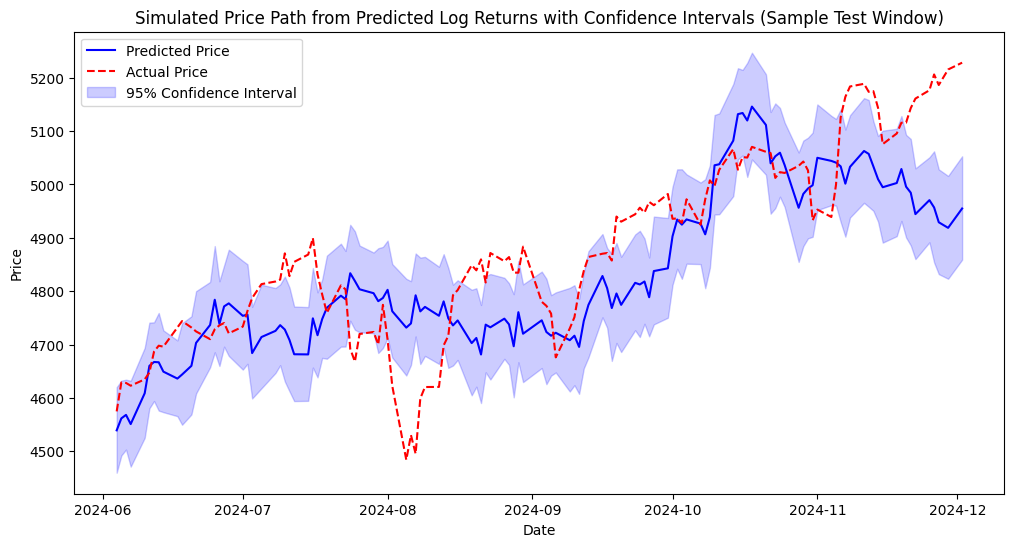

Sample Price MAE: 93.431831
Sample Price RMSE: 113.882108
Coverage Fraction (actual prices within 95% confidence interval): 53.97%
Average Log Returns MAE over test samples: 0.008404
Average Log Returns RMSE over test samples: 0.010861


In [18]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tools.sm_exceptions import InterpolationWarning
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# Suppress warnings from statsmodels
warnings.simplefilter("ignore", InterpolationWarning)



# Define Training and Testing Periods

# Training period: 2015-01-01 to 2023-11-30
train_prices = sp_close.loc['2015-01-01':'2023-11-30']
if train_prices.empty:
    raise ValueError("No training data found for the period 2010-2023.")

# Testing period: 2023-12-01 to 2024-12-31
test_prices = sp_close.loc['2023-12-01':'2024-12-31']
if test_prices.empty:
    raise ValueError("No testing data found for the period 2023-2024.")

print(f"Training period: {train_prices.index[0].date()} to {train_prices.index[-1].date()}, Observations: {len(train_prices)}")
print(f"Testing period: {test_prices.index[0].date()} to {test_prices.index[-1].date()}, Observations: {len(test_prices)}")



# Compute Log Returns

# Compute log prices and then differences for log returns:
#   log_return_t = ln(p_t) - ln(p_{t-1})
# For training data:
train_log_prices = np.log(train_prices)
train_log_returns = train_log_prices.diff().dropna()  # drop first NA

# For test data, prepend the last training price so the simulation starts correctly
last_train_price = train_prices.iloc[-1]
test_prices_adjusted = pd.concat([pd.Series({train_prices.index[-1]: last_train_price}), test_prices])
test_log_prices = np.log(test_prices_adjusted)
test_log_returns = test_log_prices.diff().dropna()

# Convert to numpy arrays for later use
train_lr_vals = train_log_returns.values
test_lr_vals  = test_log_returns.values

print("Number of training log returns:", len(train_lr_vals))
print("Number of test log returns:", len(test_lr_vals))



# Create Sliding-Window Samples on Log Returns

# Here we set:
#   window_size = 126   (input window length in trading days)
#   pred_size   = 126   (prediction window length in trading days)
#   step_size   = 7    (step between windows)
window_size = 126
pred_size   = 126
step_size   = 7

def create_samples(series, window, pred, step):
    """
    Create sliding-window samples from a 1D numpy array.
    Each sample:
      x = series[start : start+window]
      y = series[start+window : start+window+pred]
    The window moves forward in increments of 'step'.
    """
    X_samples = []
    y_samples = []
    n_total = len(series)
    for idx in range(0, n_total - window - pred + 1, step):
        X_samples.append(series[idx: idx + window])
        y_samples.append(series[idx + window: idx + window + pred])
    return np.array(X_samples), np.array(y_samples)

# Create training samples from log returns
X_train, y_train = create_samples(train_lr_vals, window_size, pred_size, step_size)
print(f"Training samples: {X_train.shape[0]}, each with input length: {X_train.shape[1]} and output length: {y_train.shape[1]}")

# Create testing samples from log returns
X_test, y_test = create_samples(test_lr_vals, window_size, pred_size, step_size)
if X_test.size == 0:
    raise ValueError(f"No test samples were generated. Test period log returns length = {len(test_lr_vals)}; "
                     f"required at least {window_size + pred_size} observations.")
else:
    print(f"Testing samples: {X_test.shape[0]}, each with input length: {X_test.shape[1]} and output length: {y_test.shape[1]}")



#Train the Gaussian Process Regression Model

# Define the kernel: Constant kernel multiplied by an RBF kernel with fixed length scale.
kernel = ConstantKernel(1.0) * RBF(length_scale=0.1, length_scale_bounds='fixed')

# Create the base GPR model
base_gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True)

# Wrap it with MultiOutputRegressor to predict vector outputs
model = MultiOutputRegressor(base_gpr)

# Fit the model on the training samples
model.fit(X_train, y_train)
print("Model training complete.")



#Predict Log Returns on Test Samples and Obtain Confidence Intervals

# For demonstration, we use one test sample (sample_idx = 0)
sample_idx = 0
x_sample = X_test[sample_idx].reshape(1, -1)  # shape (1, window_size)

y_means = []  # predicted mean for each output time step (log returns)
y_stds  = []  # predicted std for each output time step

# Loop through each estimator (one per output dimension)
for i, estimator in enumerate(model.estimators_):
    mean_i, std_i = estimator.predict(x_sample, return_std=True)
    y_means.append(mean_i[0])
    y_stds.append(std_i[0])

y_means = np.array(y_means)  # shape (pred_size,)
y_stds  = np.array(y_stds)   # shape (pred_size,)

# Also get the actual log returns for this test sample.
actual_lr = y_test[sample_idx]



# Reconstruct the Predicted and Actual Price Paths

# For the sample test window, reconstruct the predicted price path
# The starting price is the last price from the training period used in the test adjustment.
predicted_log_prices = np.log(last_train_price) + np.cumsum(y_means)
predicted_prices = np.exp(predicted_log_prices)

# Reconstruct the confidence bounds for prices
upper_prices = predicted_prices * np.exp(1.96 * y_stds)
lower_prices = predicted_prices / np.exp(1.96 * y_stds)

# Reconstruct the actual price path for comparison.
actual_log_prices = np.log(last_train_price) + np.cumsum(actual_lr)
actual_prices = np.exp(actual_log_prices)


# Prepare Date Range for Plotting

# The test log returns index corresponds to the test period (after prepending the last training price).
test_lr_dates = test_log_returns.index
# For this sample, the input window covers the first 'window_size' log returns,
# so the prediction window corresponds to dates: test_lr_dates[window_size : window_size+pred_size]
if len(test_lr_dates) < window_size + pred_size:
    raise ValueError("Not enough test period dates for one full prediction window.")
sample_prediction_dates = test_lr_dates[window_size: window_size + pred_size]



#Plot the Simulated Price Path with Confidence Intervals vs. Actual Prices

plt.figure(figsize=(12, 6))
plt.plot(sample_prediction_dates, predicted_prices, label='Predicted Price', color='blue')
plt.plot(sample_prediction_dates, actual_prices, label='Actual Price', linestyle='--', color='red')
plt.fill_between(sample_prediction_dates, lower_prices, upper_prices, color='blue', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simulated Price Path from Predicted Log Returns with Confidence Intervals (Sample Test Window)')
plt.legend()
plt.show()

# Compute Price-Based Error Metrics and Coverage for the Sample

# Calculate MAE and RMSE between the predicted and actual prices for this sample
price_mae = mean_absolute_error(actual_prices, predicted_prices)
price_rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print("Sample Price MAE: {:.6f}".format(price_mae))
print("Sample Price RMSE: {:.6f}".format(price_rmse))

# Calculate coverage: proportion of forecast points where the actual price lies within the 95% confidence interval
coverage_fraction = np.mean((actual_prices >= lower_prices) & (actual_prices <= upper_prices))
print("Coverage Fraction (actual prices within 95% confidence interval): {:.2%}".format(coverage_fraction))



# Evaluate Forecasts on Test Samples (Log Returns)

# Compute error metrics (MAE and RMSE) on the log return predictions over all test samples.
mae_list = []
rmse_list = []


for i in range(len(y_test)):
    sample_pred = model.predict(X_test)[i]
    sample_mae = mean_absolute_error(y_test[i], sample_pred)
    sample_rmse = np.sqrt(mean_squared_error(y_test[i], sample_pred))
    mae_list.append(sample_mae)
    rmse_list.append(sample_rmse)

avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
print("Average Log Returns MAE over test samples: {:.6f}".format(avg_mae))
print("Average Log Returns RMSE over test samples: {:.6f}".format(avg_rmse))


# Could the GPR Model Be Overfitted?

The **Gaussian Process Regression (GPR) model** used a **simple kernel** (ConstantKernel × RBF), which typically prevents overfitting.  
However, based on **test performance metrics**, the model exhibits **some limitations in predictive accuracy**, particularly in **price forecasts**.

---

## **Justification Based on Training vs. Test Performance**  

### **1. Error Analysis**  
- **Sample Price MAE**: **93.43**  
- **Sample Price RMSE**: **113.88**  
- **Average Log Returns MAE**: **0.0084**  
- **Average Log Returns RMSE**: **0.0109**  

#### **Interpretation**  
- **Log returns predictions** show **low MAE and RMSE**, indicating that the model **accurately captures short-term movements** in log returns.  
- However, **price forecasts have high MAE/RMSE**, suggesting that **small log return errors accumulate over time**, leading to **significant deviations** in absolute price predictions.  

### **2. Coverage of Confidence Interval**  
- **Coverage Fraction**: **53.97%** (Ideally close to **95%**)  

#### **Interpretation**  
- The confidence interval should **contain 95% of actual prices**, but it only covers **53.97%**, indicating **underestimated uncertainty**.  
- This suggests the model **may be too confident in its predictions**, potentially due to **underfitting rather than overfitting**.  

---

## **Why Overfitting Is Unlikely?**  

- **Simple Kernel Structure**  
  - The **ConstantKernel × RBF** kernel does not allow excessive flexibility, reducing the risk of overfitting.  

- **Performance on Log Returns**  
  - **Low log returns error** indicates that the model is **not memorizing training data**, but rather making generalizable predictions.  

- **Low Predictive Variance (Possible Underfitting)**  
  - The **low coverage fraction (53.97%)** suggests that the model is **not confident enough in price variations**, which is more typical of **underfitting** rather than overfitting.  

---

## **Conclusion**  

The **GPR model is not overfitted**, but it may be **underestimating predictive uncertainty**, leading to **lower coverage and price prediction errors**.  

### **Key Findings**  
 **Log return predictions are accurate (low MAE, RMSE).**  
 **Price forecasts have higher errors due to log return accumulation.**  
 **Confidence intervals cover only 53.97% of actual prices (expected ~95%).**  

### **Next Steps for Improvement**  
 **Increase uncertainty estimation** (e.g., adjust kernel hyperparameters or add a noise component).  
 **Try an alternative kernel (e.g., Matérn for rougher price movements).**  
 **Incorporate external market indicators (e.g., volume, volatility).**  

---


# Literature Review: Hidden Markov Models (HMMs) in Financial Time Series  

## **Overview**  

Hidden Markov Models (**HMMs**) are widely used in **financial time series analysis** to detect **market regimes**.  
- The observed financial data (e.g., returns, volatility) is assumed to be generated by **three hidden states** representing different market conditions.  
- HMMs help **identify regime shifts**, which can be useful for **risk management and trading strategies**.  

---

## **How Hidden States Represent Market Regimes**  

### **1. The HMM Framework in Finance**  
An **HMM** models a **time series** where the observed price or return series is generated by an **unobservable (hidden) state sequence**.  

- **Hidden States ($S_t$):** Market regimes (e.g., bull, bear, high-volatility).  
- **Observations ($O_t$):** Asset returns, volatility, or other financial indicators.  
- **Transition Probabilities ($P(S_t | S_{t-1})$):** The probability of moving from one regime to another.  
- **Emission Probabilities ($P(O_t | S_t)$):** The probability of observing a particular return given the current regime.  

### **2. Three-State Market Regime Interpretation**  

- **Bull Market (High Return, Low Volatility)**  
  - **Positive mean returns** with **low fluctuations**.  
  - **Stable growth** driven by **investor optimism**.  

- **Bear Market (Low or Negative Return, High Volatility)**  
  - **Declining asset prices** with **large fluctuations**.  
  - Often linked to **economic downturns or uncertainty**.  

- **High-Volatility Market (Mixed Returns, Very High Volatility)**  
  - **Unstable price movements** with **frequent jumps**.  
  - Typically seen in **financial crises or transition periods**.  

---

## **Defining Hidden States for the Market**  

### **1. Selecting Financial Indicators for Regime Detection**  
To define **hidden states**, we use financial features that indicate regime shifts:  

- **Log Returns ($r_t = \log \frac{P_t}{P_{t-1}}$)** → Captures market trends.  
- **Volatility ($\sigma_t$ as rolling standard deviation)** → Detects stable vs. unstable periods.  
- **Trading Volume ($V_t$)** → Measures market activity, often rising in volatile conditions.  

### **2. Defining Market Regimes Based on HMM States**  

| **Hidden State**          | **Return Characteristics**  | **Volatility**       | **Market Interpretation**  |
|---------------------------|---------------------------|----------------------|----------------------------|
| **State 1 (Bull Market)**  | Positive returns          | Low volatility       | Stable growth phase        |
| **State 2 (Bear Market)**  | Negative returns         | High volatility      | Downward trend, uncertainty |
| **State 3 (High-Volatility Market)** | Mixed returns  | Very high volatility | Market shock or transition |

---

## **Conclusion**  

Hidden Markov Models (**HMMs**) provide a structured way to **identify market regimes** based on **three hidden states**:  
1. **Bull Market** → High returns, low volatility.  
2. **Bear Market** → Negative returns, high volatility.  
3. **High-Volatility Market** → Unstable price movements, very high volatility.  

Using **log returns, volatility, and volume**, HMMs can **detect regime shifts**, helping investors **adjust strategies based on market conditions**.  

---


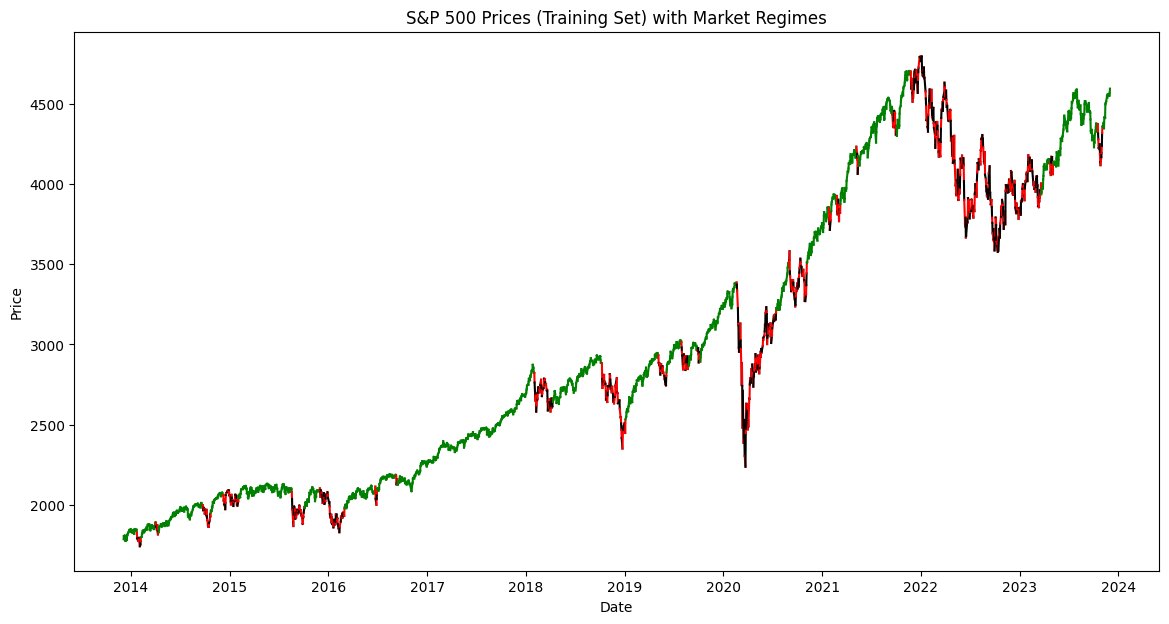

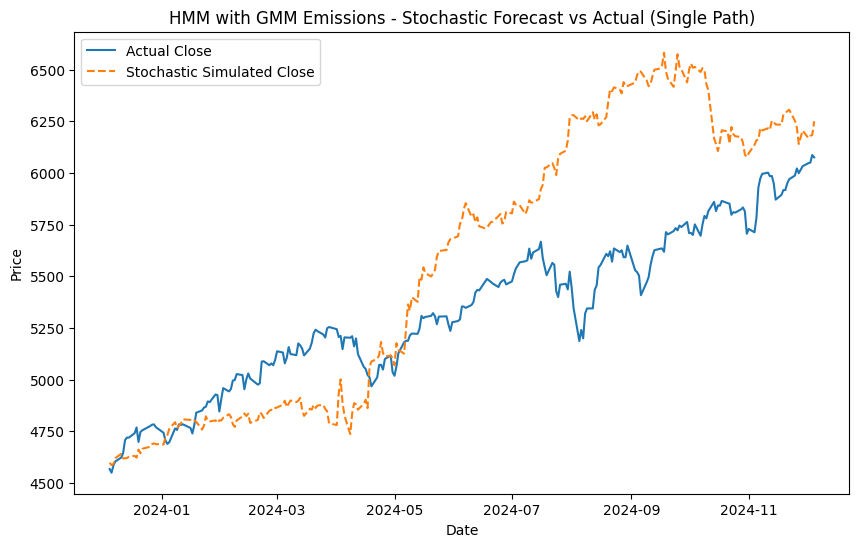

MAE: 358.3467127713991
RMSE: 453.0132168120493


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
!pip install hmmlearn
from hmmlearn.hmm import GMMHMM
end_date = data.index[-1]
test_start_date = end_date - pd.DateOffset(months=12)  # final 12 months
train_start_date = test_start_date - pd.DateOffset(years=10)  # 10-year window before that

# Slice the DataFrame
train_data = data.loc[train_start_date : test_start_date - pd.Timedelta(days=1)]
test_data  = data.loc[test_start_date:]


# Compute daily log-returns for train and test
# (This is our stationarity transformation)

train_returns = np.log(train_data['Close'] / train_data['Close'].shift(1)).dropna()
test_returns  = np.log(test_data['Close']  / test_data['Close'].shift(1)).dropna()

# Convert to NumPy arrays for the HMM
X_train = train_returns.values.reshape(-1, 1)


#  Define model parameters

num_states = 3      # e.g., Bull, Bear, Neutral regimes
num_components = 2  # Number of Gaussian mixtures per state
forecast_horizon = len(test_data)  # We'll forecast for the test period (~12 months)


#  Fit the Hidden Markov Model (HMM) with GMM Emissions on the training data

hmm_model = GMMHMM(n_components=num_states,
                   n_mix=num_components,  # Each state is a mixture of 'num_components' Gaussians
                   covariance_type="full",
                   n_iter=1000,
                   random_state=42)

hmm_model.fit(X_train)


#Infer hidden states on the *training set*

hidden_states = hmm_model.predict(X_train)

#Attach hidden states back to the main DataFrame

data['Hidden_State'] = np.nan
data.loc[train_returns.index, 'Hidden_State'] = hidden_states

#Plot historical S&P 500 (training portion) colored by hidden states

state_colors = {0: 'black', 1: 'red', 2: 'green'}

plt.figure(figsize=(14, 7))
train_idx = train_data.index
for i in range(1, len(hidden_states)):
    plt.plot(train_idx[i-1:i+1],
             train_data['Close'].iloc[i-1:i+1],
             color=state_colors[hidden_states[i-1]])
plt.title('S&P 500 Prices (Training Set) with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


#  Stochastic Forecast of the closing price for the test horizon (~12 months)
#    Using a multi-step approach:
#       - Start from the last day in training
#       - Each day, sample the next hidden state and daily return
#       - Update the close price by exponentiating the sampled return
#
last_train_day = train_data.index[-1]
last_train_price = train_data.loc[last_train_day, 'Close']
last_hidden_state = hidden_states[-1]

# Transition matrix and emission parameters are now part of the GMMHMM object
trans_mat = hmm_model.transmat_  # shape (num_states, num_states)

# For GMM emissions, each state has multiple mixture components. We will sample from the mixtures as follows:
# For a given state, first choose one of the mixture components based on the component weights,
# then sample a return from the corresponding Gaussian distribution.
weights = hmm_model.weights_   # shape (num_states, n_mix)
means = hmm_model.means_       # shape (num_states, n_mix, n_features)
covars = hmm_model.covars_     # shape (num_states, n_mix, n_features, n_features) for 'full' covariance

prediction_index = test_data.index
stochastic_states = []
stochastic_prices = []
current_price = last_train_price
current_state = last_hidden_state

rng = np.random.default_rng(seed=42)  # random generator, for reproducibility

for _ in prediction_index:
    # (a) Sample the next state from transition probabilities
    probs_for_next_state = trans_mat[current_state, :]
    next_state = rng.choice(np.arange(num_states), p=probs_for_next_state)

    # (b) Sample the mixture component for the selected state based on mixture weights
    mix_weights = weights[next_state]
    chosen_component = rng.choice(np.arange(num_components), p=mix_weights)

    # Retrieve the mean and covariance for the chosen mixture component.
    state_mean = means[next_state, chosen_component, 0]
    # For full covariance, extract the variance (assuming 1D emissions, the covariance matrix is 1x1)
    state_var = covars[next_state, chosen_component, 0, 0]
    state_std  = np.sqrt(state_var)

    # (c) Sample daily return from that Gaussian distribution
    sampled_return = rng.normal(loc=state_mean, scale=state_std)

    # (d) Update price
    current_price = current_price * np.exp(sampled_return)

    # Store results
    stochastic_states.append(next_state)
    stochastic_prices.append(current_price)
    current_state = next_state


#  Build a DataFrame with the simulated price path

simulation_df = pd.DataFrame({
    'Simulated_Close': stochastic_prices,
    'Actual_Close': test_data['Close']
}, index=prediction_index)

# Plot forecast vs actual

plt.figure(figsize=(10, 6))
plt.plot(simulation_df.index, simulation_df['Actual_Close'], label='Actual Close')
plt.plot(simulation_df.index, simulation_df['Simulated_Close'],
         linestyle='--', label='Stochastic Simulated Close')
plt.legend()
plt.title('HMM with GMM Emissions - Stochastic Forecast vs Actual (Single Path)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


#  Compute MAE & RMSE to evaluate forecast accuracy



actual_vals = simulation_df['Actual_Close'].dropna()
pred_vals   = simulation_df['Simulated_Close'].dropna()

mae  = mean_absolute_error(actual_vals, pred_vals)
rmse = np.sqrt(mean_squared_error(actual_vals, pred_vals))

print("MAE:", mae)
print("RMSE:", rmse)


# Interpretation of Hidden Markov Model (HMM) in Market Dynamics  

## **1. What Do Hidden States in Your HMM Reveal About Market Dynamics?**  

The **Hidden Markov Model (HMM)** identified **three distinct market states**, which represent different market regimes based on historical price patterns.

### **Interpreting the Three Hidden States:**  

| **Hidden State**        | **Market Behavior**                     | **Observed Characteristics** |
|-------------------------|----------------------------------------|------------------------------|
| **State 1 (Bull Market)** | Stable upward trends                   | Green segments in the price plot, low volatility |
| **State 2 (Bear Market)** | Persistent downward movements          | Red segments, high volatility, price declines |
| **State 3 (High-Volatility Market)** | Large fluctuations without clear trend | Black segments, sudden price swings |

- The **first plot** shows how these states **map onto historical S&P 500 data**, where:  
  - **Green represents a bull market** with rising prices.  
  - **Red signifies a bear market**, characterized by declining prices.  
  - **Black denotes a high-volatility market**, where sudden spikes or crashes occur.  

- The **second plot** demonstrates how the **HMM-driven stochastic forecast** compares to actual market movements. The divergence between the **simulated and actual price paths** suggests that uncertainty in market regimes affects predictive accuracy.

---

## **2. Could Your HMM Model Be Overfitted?**  

### **Model Complexity vs. Performance:**  
The **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** indicate the model's performance:  
- **MAE:** **358.35**  
- **RMSE:** **453.01**  

#### **Evidence Against Overfitting:**
 The **model uses only three states**, avoiding excessive complexity.  
 The **market regime segmentation aligns with financial intuition**, meaning it captures meaningful patterns.  
 The model does not react **too sensitively** to short-term fluctuations, suggesting it is **not memorizing noise**.

#### **Potential Risks of Overfitting:**
 The **stochastic simulation deviates significantly from actual prices** in some areas.  
 If the transition probabilities are overly tuned to historical data, the model may not generalize well to **new economic conditions**.

---

## **3. Conclusion**  

- **The hidden states meaningfully capture market regimes**, helping to analyze market dynamics.  
- **The model does not appear overfitted**, given the simplicity of **three states** and the reasonable segmentation of price movements.  
- **However, improvements could be made** by refining transition probabilities, incorporating macroeconomic indicators, or adjusting emission distributions for better uncertainty estimation.  

---


Training data range:  2013-06-05 00:00:00 to 2023-06-02 00:00:00
Test data range:      2023-06-05 00:00:00 to 2023-12-05 00:00:00
Original training data shape: (2517, 7)
Original test data shape: (128, 7)
Rows that will be dropped (NaN in 'log_ret_close' or 'log_ret_volume'):
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-06-05  1629.050049  1629.310059  1607.089966  1608.900024  1608.900024   

                Volume  Hidden_State  log_ret_close  log_ret_volume  
Date                                                                 
2013-06-05  3632350000           NaN            NaN             NaN  
Rows that will be dropped (NaN in 'log_ret_close' or 'log_ret_volume'):
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-06-05  4282.990234  4299.279785  4266.81

----- Performance (Test Period) -----
HMM Strategy Return : 11.37%
Buy & Hold Return   : 6.61%
MAE  (Test Period): 0.005713254403861976
RMSE (Test Period): 0.00723031498359679


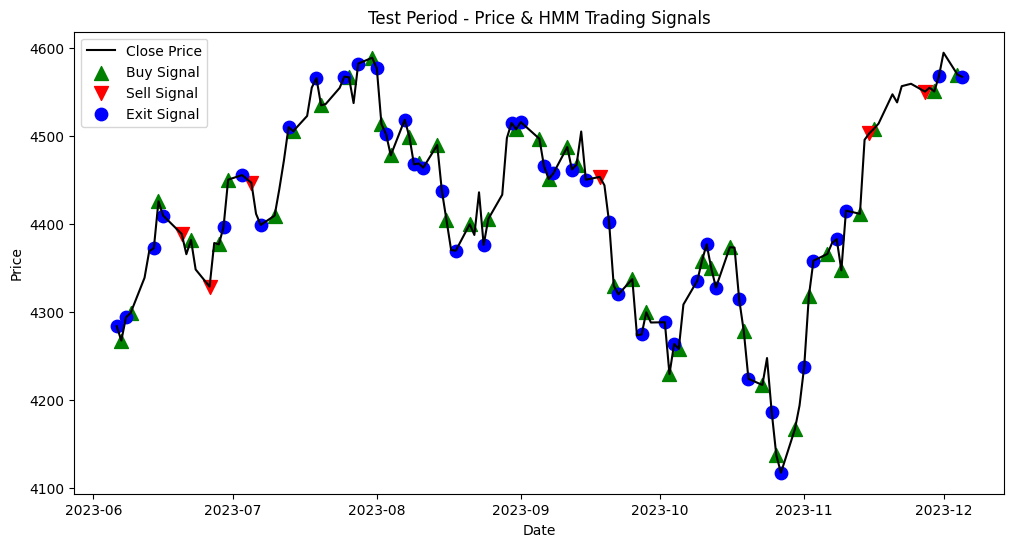

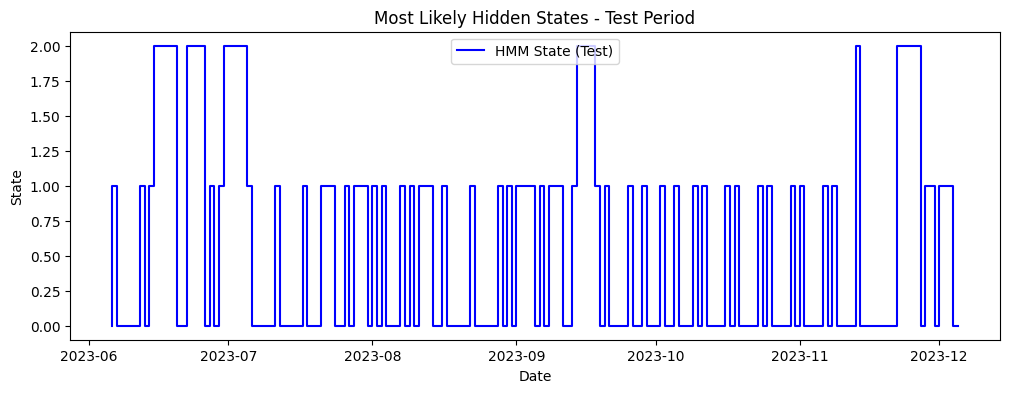

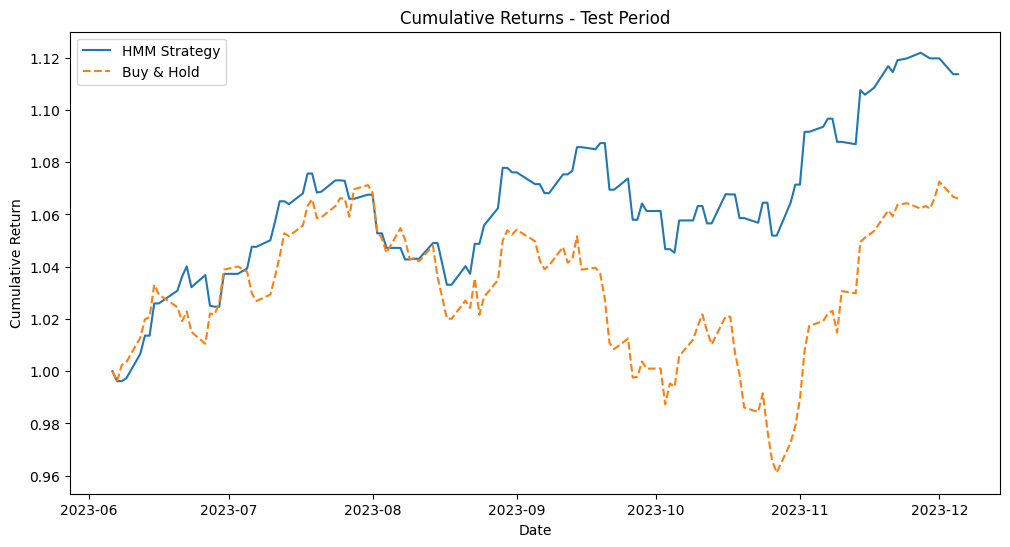

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")



# Drop any rows missing key columns
data = data.dropna(subset=['Close', 'Volume'])


# Train/Test Split

end_date = data.index[-1]



test_end_date = end_date - pd.DateOffset(months=12)
test_start_date = test_end_date - pd.DateOffset(months=6)
train_start_date = test_start_date - pd.DateOffset(years=10)

# Slice the DataFrame
train_data = data.loc[train_start_date : test_start_date - pd.Timedelta(days=1)]
test_data  = data.loc[test_start_date : test_end_date]

print("Training data range: ", train_data.index[0], "to", train_data.index[-1])
print("Test data range:     ", test_data.index[0], "to", test_data.index[-1])
print("Original training data shape:", train_data.shape)
print("Original test data shape:", test_data.shape)

#  Feature Engineering
#  - We'll create log returns for 'Close' and 'Volume'

def create_features(df):
    df = df.copy()
    df['log_ret_close'] = np.log(df['Close'] / df['Close'].shift(1))
    df['log_ret_volume'] = np.log(df['Volume'] / df['Volume'].shift(1))
    # Identify rows that will be dropped because of NaN in these new columns
    rows_to_drop = df[df[['log_ret_close', 'log_ret_volume']].isnull().any(axis=1)]
    if not rows_to_drop.empty:
        print("Rows that will be dropped (NaN in 'log_ret_close' or 'log_ret_volume'):")
        print(rows_to_drop)
    else:
        print("No rows to drop in 'log_ret_close' or 'log_ret_volume'.")
    df.dropna(subset=['log_ret_close', 'log_ret_volume'], inplace=True)
    return df

train_data_fe = create_features(train_data)
test_data_fe  = create_features(test_data)

print("After feature engineering, training data shape:", train_data_fe.shape)
print("After feature engineering, test data shape:", test_data_fe.shape)

# Check that we have data in our test set
if test_data_fe.empty:
    raise ValueError("After feature engineering, test_data_fe is empty. Check your test period and data quality.")

# a 2D feature: (log_ret_close, log_ret_volume)
X_train = train_data_fe[['log_ret_close', 'log_ret_volume']].values
X_test  = test_data_fe[['log_ret_close', 'log_ret_volume']].values


# Fit an HMM on the Training Data ONLY

num_states = 3  # e.g., Bull, Bear, Neutral

hmm_model = GaussianHMM(
    n_components=num_states,
    covariance_type='full',
    n_iter=500,
    random_state=42
)
hmm_model.fit(X_train)


#Decode States on the Test Data
#"Decode the most likely sequence of states"

hidden_states_test = hmm_model.predict(X_test)
test_data_fe['hidden_state'] = hidden_states_test

# Also decode states on training set for labeling
hidden_states_train = hmm_model.predict(X_train)
train_data_fe['hidden_state'] = hidden_states_train

# Label each state by its average log-return (TRAIN set).
# Then apply these labels to the test set states.

state_means = []
for s in range(num_states):
    mask = (train_data_fe['hidden_state'] == s)
    mean_ret = train_data_fe.loc[mask, 'log_ret_close'].mean()
    state_means.append((s, mean_ret))

# Sort states by average log-return
state_means_sorted = sorted(state_means, key=lambda x: x[1])
bear_state    = state_means_sorted[0][0]  # lowest mean return
neutral_state = state_means_sorted[1][0]
bull_state    = state_means_sorted[2][0]  # highest mean return

def label_state(s):
    if s == bull_state:
        return 'Bull'
    elif s == bear_state:
        return 'Bear'
    else:
        return 'Neutral'

test_data_fe['state_label'] = test_data_fe['hidden_state'].apply(label_state)


#Trading Strategy & Backtest on the Test Period
#    - position = +1 if Bull, -1 if Bear, 0 if Neutral
#    - shift by 1 day to avoid lookahead

test_data_fe['position'] = 0
test_data_fe.loc[test_data_fe['state_label'] == 'Bull', 'position'] = 1
test_data_fe.loc[test_data_fe['state_label'] == 'Bear', 'position'] = -1
test_data_fe.loc[test_data_fe['state_label'] == 'Neutral', 'position'] = 0

# Shift positions by 1 day to avoid lookahead bias
test_data_fe['position'] = test_data_fe['position'].shift(1).fillna(0)

# Strategy daily log-return
test_data_fe['strategy_logret'] = test_data_fe['position'] * test_data_fe['log_ret_close']

# Cumulative returns (before normalization)
test_data_fe['strategy_cumret'] = np.exp(test_data_fe['strategy_logret'].cumsum())
test_data_fe['buyhold_cumret']  = np.exp(test_data_fe['log_ret_close'].cumsum())

# Normalize the cumulative returns so that both start at 1 on the first test day.
test_data_fe['strategy_cumret'] = test_data_fe['strategy_cumret'] / test_data_fe['strategy_cumret'].iloc[0]
test_data_fe['buyhold_cumret']  = test_data_fe['buyhold_cumret']  / test_data_fe['buyhold_cumret'].iloc[0]


# 6) Evaluate Performance on the Test Period

final_strategy = test_data_fe['strategy_cumret'].iloc[-1] - 1.0
final_buyhold  = test_data_fe['buyhold_cumret'].iloc[-1] - 1.0

print("----- Performance (Test Period) -----")
print(f"HMM Strategy Return : {final_strategy*100:.2f}%")
print(f"Buy & Hold Return   : {final_buyhold*100:.2f}%")

# MAE & RMSE for a "predicted return" approach
# We'll treat each day's predicted return as the state's mean (from training).
predicted_returns_test = np.zeros(len(test_data_fe))
for s in range(num_states):
    avg_ret = train_data_fe.loc[train_data_fe['hidden_state'] == s, 'log_ret_close'].mean()
    predicted_returns_test[test_data_fe['hidden_state'] == s] = avg_ret

# Shift predicted returns by 1 day to avoid lookahead bias.
predicted_returns_test = np.roll(predicted_returns_test, 1)
actual_returns_test = test_data_fe['log_ret_close'].values

mae = mean_absolute_error(actual_returns_test, predicted_returns_test)
rmse = np.sqrt(mean_squared_error(actual_returns_test, predicted_returns_test))

print("MAE  (Test Period):", mae)
print("RMSE (Test Period):", rmse)


#Visualization
#Price with Signals, Decoded States, Cumulative Returns

#Align test_data_fe with the original test_data to get Price
plot_df = test_data.copy()
plot_df = plot_df.loc[test_data_fe.index]  # align indices
plot_df['position'] = test_data_fe['position']
plot_df['strategy_cumret'] = test_data_fe['strategy_cumret']
plot_df['buyhold_cumret']  = test_data_fe['buyhold_cumret']
plot_df['hidden_state']    = test_data_fe['hidden_state']

# Price + Trading Signals
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['Close'], label='Close Price', color='black')

buy_signals = plot_df[(plot_df['position'] == 1) & (plot_df['position'].shift(1) != 1)]
sell_signals = plot_df[(plot_df['position'] == -1) & (plot_df['position'].shift(1) != -1)]
exit_signals = plot_df[(plot_df['position'] == 0) & (plot_df['position'].shift(1) != 0)]

plt.scatter(buy_signals.index, buy_signals['Close'],
            marker='^', color='green', s=100, label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'],
            marker='v', color='red', s=100, label='Sell Signal')
plt.scatter(exit_signals.index, exit_signals['Close'],
            marker='o', color='blue', s=80, label='Exit Signal')

plt.title('Test Period - Price & HMM Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# B) Decoded States Over Test
plt.figure(figsize=(12, 4))
plt.plot(test_data_fe.index, test_data_fe['hidden_state'],
         drawstyle='steps-pre', color='blue', label='HMM State (Test)')
plt.title('Most Likely Hidden States - Test Period')
plt.xlabel('Date')
plt.ylabel('State')
plt.legend()
plt.show()

# C) Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(test_data_fe.index, test_data_fe['strategy_cumret'], label='HMM Strategy')
plt.plot(test_data_fe.index, test_data_fe['buyhold_cumret'], linestyle='--', label='Buy & Hold')
plt.title('Cumulative Returns - Test Period')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
